In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from lab_helper import plot_boundaries, plot_boundaries_keras
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot as plt
from PlotCallback import PlotCallback
from multiclass_helper import draw_neural_net
from keras import backend as K

/Users/julian/opt/anaconda3/envs/pef/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
def generate_gaussians_distributions(sep=1, N=500, random_state=42, normalize=True):
    np.random.seed(random_state)
    # Zeros
    X1 = np.random.multivariate_normal(sep*np.array([0.5, 0.5]), [[0.1,-0.085],[-0.085,0.1]], N//2)
    # Ones
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    indexes = np.arange(len(y))
    np.random.shuffle(indexes)
    if normalize:
        X = (X - X.mean(axis=0))/X.std(axis=0)
    else:
        X[:, 0] = X[:, 0]
        X[:, 1] = X[:, 1]
    return X[indexes], y[indexes]

In [4]:
# Primero probar con N = 3000 para ver bien las distribuciones
X, y = generate_gaussians_distributions(sep=2, N = 500, normalize=False, random_state=41)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

# Armar modelos cambiando loss y función de activación
- linear, sigmoid
- mse, binary_crossentropy

In [6]:
model = Sequential()
# Que pasa si no pongo la función de activación??!
model.add(Dense(1, input_shape=(2,), kernel_regularizer=l2() ,activation='linear'))
model.compile(Adam(lr=0.1), loss='mse', metrics=['accuracy'])

In [7]:
model.fit(X, y, epochs=10, verbose=1, batch_size=100)

Epoch 1/10
5/5 [==============================] - 0s 774us/step - loss: 1.2579 - accuracy: 0.0400
Epoch 2/10
5/5 [==============================] - 0s 726us/step - loss: 0.3095 - accuracy: 0.5200
Epoch 3/10
5/5 [==============================] - 0s 618us/step - loss: 0.0573 - accuracy: 0.9780
Epoch 4/10
5/5 [==============================] - 0s 512us/step - loss: 0.1225 - accuracy: 0.9960
Epoch 5/10
5/5 [==============================] - 0s 534us/step - loss: 0.1395 - accuracy: 0.9980
Epoch 6/10
5/5 [==============================] - 0s 656us/step - loss: 0.0686 - accuracy: 0.9960
Epoch 7/10
5/5 [==============================] - 0s 662us/step - loss: 0.0254 - accuracy: 0.9940
Epoch 8/10
5/5 [==============================] - 0s 689us/step - loss: 0.0311 - accuracy: 0.9940
Epoch 9/10
5/5 [==============================] - 0s 477us/step - loss: 0.0350 - accuracy: 0.9980
Epoch 10/10
5/5 [==============================] - 0s 578us/step - loss: 0.0245 - accuracy: 1.0000


16/16 [==============================] - 0s 418us/step - loss: 0.0202 - accuracy: 1.0000
Instructions for updating:
Please use `model.predict()` instead.
(41820, 1)


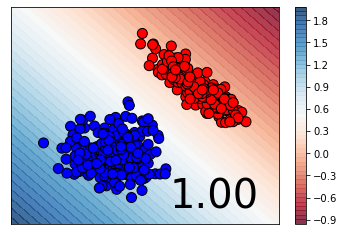

In [8]:
plot_boundaries_keras(X, y, model.evaluate(X,y)[1], probability_func=model.predict_proba)

In [9]:
model.predict_proba(X)[:10]

array([[ 1.0711584 ],
       [ 0.10568058],
       [-0.08083516],
       [ 0.11004835],
       [-0.00704974],
       [ 0.56400514],
       [ 0.09818399],
       [ 0.02009517],
       [ 0.99467397],
       [ 0.15357137]], dtype=float32)

# Regresión lineal

In [10]:
X = np.random.normal(0, 1, 100)
A = 2
B = 1
y = A*X + B +  np.random.normal(0, 1, len(X))

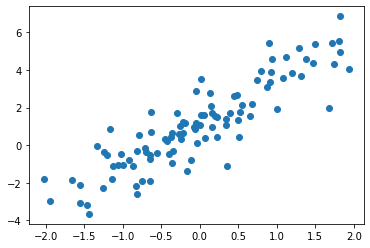

In [11]:
plt.scatter(X, y)
plt.show()

In [12]:
model = Sequential()
# Que pasa si no pongo la función de activación??!
model.add(Dense(1, input_shape=(1,), kernel_regularizer=l2() ,activation='linear'))

In [13]:
model.compile(Adam(lr=0.001), loss='mse', metrics=['mse'])

In [14]:
model.fit(X, y, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 958us/step - loss: 3.6325 - mse: 3.6236
Epoch 2/10
4/4 [==============================] - 0s 621us/step - loss: 3.6159 - mse: 3.6069
Epoch 3/10
4/4 [==============================] - 0s 586us/step - loss: 3.5993 - mse: 3.5903
Epoch 4/10
4/4 [==============================] - 0s 694us/step - loss: 3.5840 - mse: 3.5749
Epoch 5/10
4/4 [==============================] - 0s 511us/step - loss: 3.5688 - mse: 3.5596
Epoch 6/10
4/4 [==============================] - 0s 503us/step - loss: 3.5544 - mse: 3.5451
Epoch 7/10
4/4 [==============================] - 0s 573us/step - loss: 3.5389 - mse: 3.5297
Epoch 8/10
4/4 [==============================] - 0s 542us/step - loss: 3.5250 - mse: 3.5157
Epoch 9/10
4/4 [==============================] - 0s 478us/step - loss: 3.5089 - mse: 3.4995
Epoch 10/10
4/4 [==============================] - 0s 478us/step - loss: 3.4928 - mse: 3.4833


In [180]:
A_pred, B_pred = model.get_weights()
print(A_pred, B_pred)

[[1.964852]] [1.0495688]


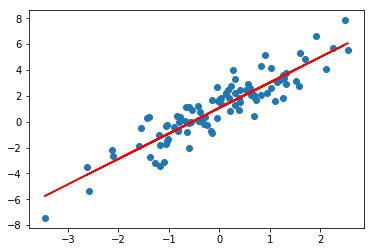

In [181]:
y_pred = A_pred[0][0]*X + B_pred[0] 
plt.scatter(X, y)
plt.plot(X, y_pred, color='r')
plt.show()

# MLP

In [248]:
X, y = generate_gaussians_distributions(sep=1, N = 50, normalize=False, random_state=41)

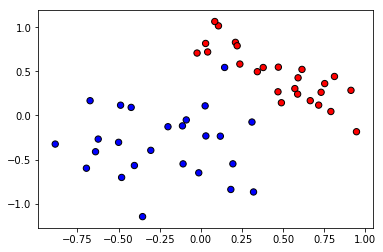

In [249]:
plot_boundaries(X,y)

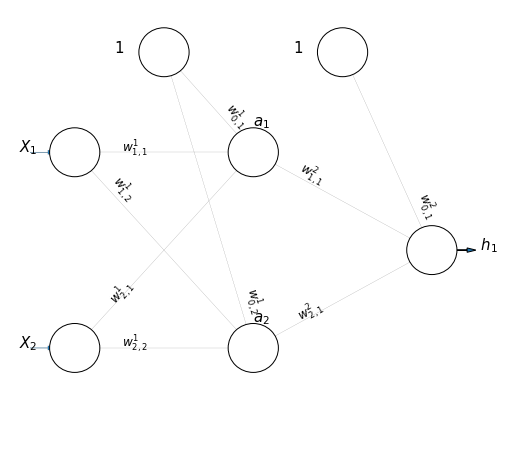

In [332]:
fig, ax = plt.subplots(1,1,figsize=(8, 8))
biases = [['$w_{0,1}^1$',  '$w_{0,2}^1$'], 
          ['$w_{0,1}^2$']]
capa_1 = [[ '$w_{1,1}^1$', '$w_{1,2}^1$'],
          [ '$w_{2,1}^1$', '$w_{2,2}^1$']]
capa_2 = [['$w_{1,1}^2$'],
          ['$w_{2,1}^2$'], 
          ['$w_{3,1}^2$']]
weights = [np.array(capa_1),np.array(capa_2)]
draw_neural_net(ax, 0.1, 0.9, 0, 0.9, [2,2,1], weights, biases)
plt.show()

In [333]:
model = Sequential()
model.add(Dense(2, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [334]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [335]:
model.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [336]:
# Arrancar con lr = 0.01, bs=128
K.set_value(model.optimizer.lr, 0.1)
model.fit(X, y, epochs=1000, verbose=0, batch_size=128)

50/50 [==============================] - 0s 6ms/step
(22862, 1)


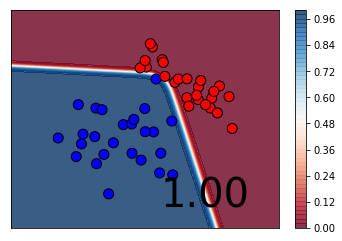

In [337]:
plot_boundaries_keras(X, y, model.evaluate(X,y)[1], probability_func=model.predict_proba)